In [1]:
!kaggle datasets download -d balaka18/email-spam-classification-dataset-csv

Dataset URL: https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv
License(s): ODbL-1.0
 60%|██████████████████████▉               | 1.00M/1.66M [00:00<00:00, 1.99MB/s]
100%|██████████████████████████████████████| 1.66M/1.66M [00:00<00:00, 2.92MB/s]


In [3]:
import zipfile

# Unzip the dataset
with zipfile.ZipFile('email-spam-classification-dataset-csv.zip', 'r') as zip_ref:
    zip_ref.extractall('dataset_directory')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC, OneClassSVM
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import time
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [5]:
df = pd.read_csv('/kaggle/working/dataset_directory/emails.csv')
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [6]:
df.drop(columns='Email No.', inplace=True)

In [7]:
X = df.drop(columns='Prediction')
y = df['Prediction']

In [8]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

SVM_Accuracy: 96.33%
Time taken in SVM training: 15.1769 seconds
Time taken in SVM testing: 5.5612 seconds
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       739
           1       0.97      0.90      0.93       296

    accuracy                           0.96      1035
   macro avg       0.97      0.94      0.95      1035
weighted avg       0.96      0.96      0.96      1035



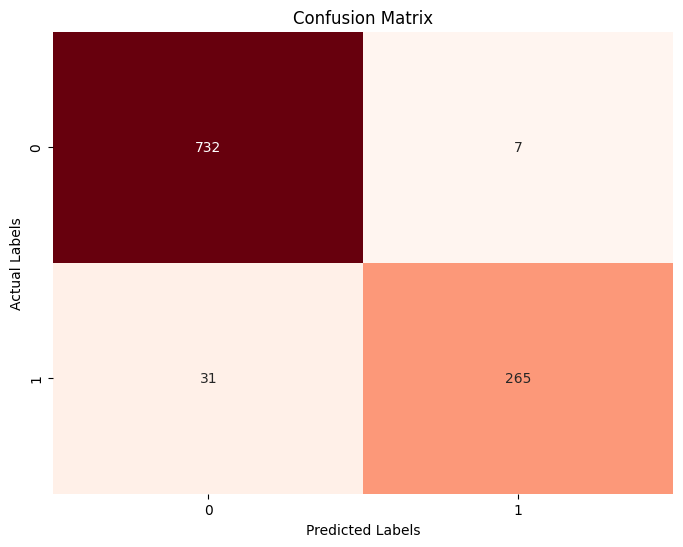

In [10]:
model = SVC()
start_time_train = time.time()
# Train the model
model.fit(X_train, y_train)
end_time_train = time.time()
# Make predictions
start_time_test = time.time()
y_pred = model.predict(X_test)
end_time_test = time.time()
# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred)
print(f'SVM_Accuracy: {accuracy_svm * 100:.2f}%')

execution_time_train = end_time_train - start_time_train
print(f'Time taken in SVM training: {execution_time_train:.4f} seconds')

execution_time_test = end_time_test - start_time_test
print(f'Time taken in SVM testing: {execution_time_test:.4f} seconds')

report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

One class SVM Accuracy: 71.40%
Time taken in One class SVM training: 0.6894 seconds
Time taken in One class SVM testing: 0.0962 seconds
              precision    recall  f1-score   support

           0       0.72      0.99      0.83       739
           1       0.50      0.02      0.03       296

    accuracy                           0.71      1035
   macro avg       0.61      0.51      0.43      1035
weighted avg       0.65      0.71      0.60      1035



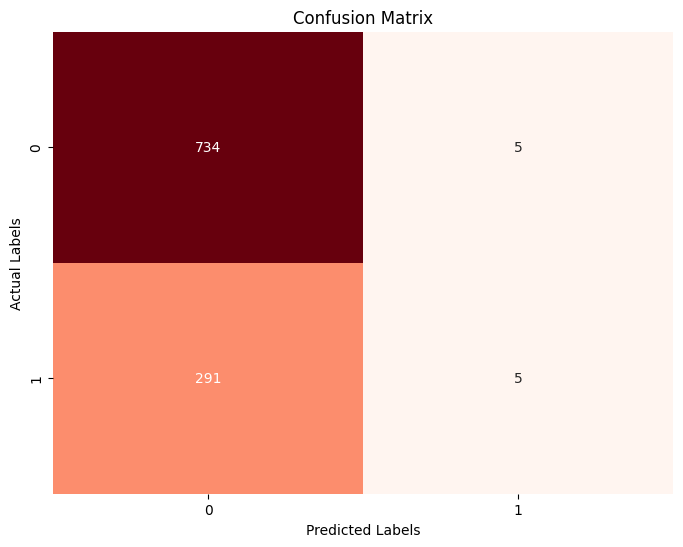

In [11]:
model = OneClassSVM(nu = 0.01, kernel = 'rbf', gamma = 'auto')
start_time_train = time.time()
# Train the model
model.fit(X_train, y_train)
end_time_train = time.time()
# Make predictions
start_time_test = time.time()
y_pred = model.predict(X_test)
y_pred = [1 if i==-1 else 0 for i in y_pred]
end_time_test = time.time()
# Calculate accuracy
accuracy_svm_1 = accuracy_score(y_test, y_pred)
print(f'One class SVM Accuracy: {accuracy_svm_1 * 100:.2f}%')

execution_time_train = end_time_train - start_time_train
print(f'Time taken in One class SVM training: {execution_time_train:.4f} seconds')

execution_time_test = end_time_test - start_time_test
print(f'Time taken in One class SVM testing: {execution_time_test:.4f} seconds')

report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [12]:
X = df.drop(columns='Prediction')
y = df['Prediction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Guassian Naive Bayes Accuracy: 94.78%
Time taken in Guassian Naive Bayes training: 0.2710 seconds
Time taken in Guassian Naive Bayes testing: 0.0759 seconds
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       739
           1       0.87      0.96      0.91       296

    accuracy                           0.95      1035
   macro avg       0.93      0.95      0.94      1035
weighted avg       0.95      0.95      0.95      1035



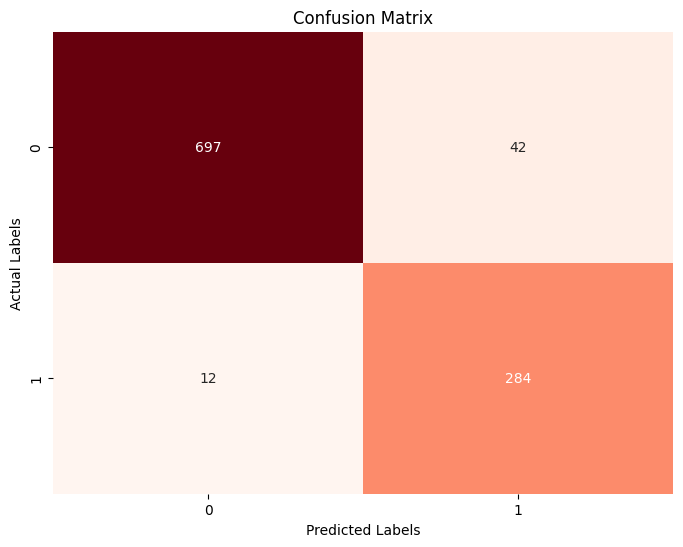

In [13]:
model = GaussianNB()
start_time_train = time.time()
# Train the model
model.fit(X_train, y_train)
end_time_train = time.time()
# Make predictions
start_time_test = time.time()
y_pred = model.predict(X_test)
end_time_test = time.time()
# Calculate accuracy
accuracy_GNB = accuracy_score(y_test, y_pred)
print(f'Guassian Naive Bayes Accuracy: {accuracy_GNB * 100:.2f}%')

execution_time_train = end_time_train - start_time_train
print(f'Time taken in Guassian Naive Bayes training: {execution_time_train:.4f} seconds')

execution_time_test = end_time_test - start_time_test
print(f'Time taken in Guassian Naive Bayes testing: {execution_time_test:.4f} seconds')

report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

Multinomaial Naive Bayes Accuracy: 95.46%
Time taken in Multinomaial Naive Bayes training: 0.0733 seconds
Time taken in Multinomaial Naive Bayes testing: 0.0646 seconds
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       739
           1       0.89      0.96      0.92       296

    accuracy                           0.95      1035
   macro avg       0.94      0.96      0.95      1035
weighted avg       0.96      0.95      0.96      1035



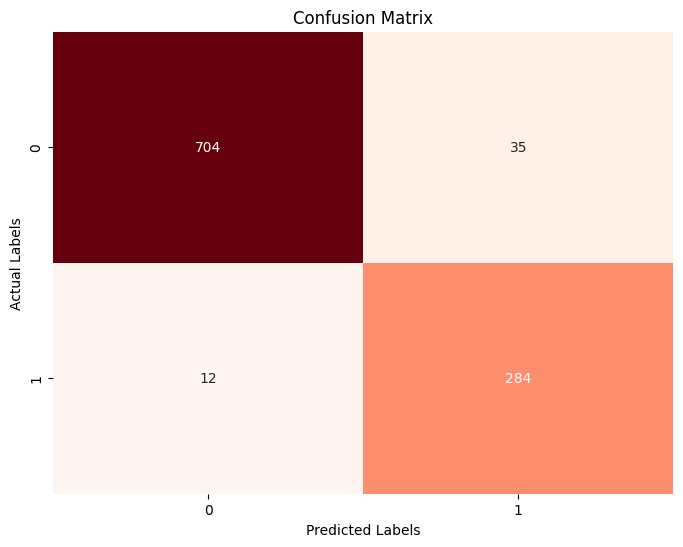

In [14]:
model = MultinomialNB()
start_time_train = time.time()
# Train the model
model.fit(X_train, y_train)
end_time_train = time.time()
# Make predictions
start_time_test = time.time()
y_pred = model.predict(X_test)
end_time_test = time.time()
# Calculate accuracy
accuracy_MNB = accuracy_score(y_test, y_pred)
print(f'Multinomaial Naive Bayes Accuracy: {accuracy_MNB * 100:.2f}%')

execution_time_train = end_time_train - start_time_train
print(f'Time taken in Multinomaial Naive Bayes training: {execution_time_train:.4f} seconds')

execution_time_test = end_time_test - start_time_test
print(f'Time taken in Multinomaial Naive Bayes testing: {execution_time_test:.4f} seconds')

report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, AveragePooling1D
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Conv1D, BatchNormalization, Activation, Add, GlobalAveragePooling1D, Dense, MaxPooling1D

In [16]:
input_layer = Input(shape=(X_train.shape[1], 1))

# Initial Conv1D layer
x = Conv1D(128, kernel_size=3, padding='same', strides=1)(input_layer)
x = BatchNormalization()(x)
x = Activation('relu')(x)

# Residual Block 1
shortcut = x
x = Conv1D(128, kernel_size=3, strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv1D(128, kernel_size=3, strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = Add()([x, shortcut])
x = Activation('relu')(x)

# Residual Block 2 with Downsampling
shortcut = x
x = Conv1D(256, kernel_size=3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv1D(256, kernel_size=3, strides=1, padding='same')(x)
x = BatchNormalization()(x)

# Adjust shortcut for downsampling
shortcut = Conv1D(256, kernel_size=1, strides=2, padding='same')(shortcut)
shortcut = BatchNormalization()(shortcut)
x = Add()([x, shortcut])
x = Activation('relu')(x)

# Residual Block 3 with Further Downsampling
shortcut = x
x = Conv1D(512, kernel_size=3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Conv1D(512, kernel_size=3, strides=1, padding='same')(x)
x = BatchNormalization()(x)

# Adjust shortcut for further downsampling
shortcut = Conv1D(512, kernel_size=1, strides=2, padding='same')(shortcut)
shortcut = BatchNormalization()(shortcut)
x = Add()([x, shortcut])
x = Activation('relu')(x)

# Flatten and fully connected layers
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(16, activation='relu')(x)

# Output layer for classification
output_layer = Dense(1, activation='sigmoid')(x)

# Create model
model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

# Print the model summary
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 3000, 1)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 3000, 128) │        512 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 3000, 128) │        512 │ conv1d[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 3000, 128) │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 3000, 128) │     49,280 │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 3000, 128) │        512 │ conv1d_1[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 3000, 128) │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 3000, 128) │     49,280 │ activation_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 3000, 128) │        512 │ conv1d_2[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 3000, 128) │          0 │ batch_normalizat… │
│                     │                   │            │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 3000, 128) │          0 │ add[0][0]         │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 1500, 256) │     98,560 │ activation_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1500, 256) │      1,024 │ conv1d_3[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 1500, 256) │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 1500, 256) │    196,864 │ activation_3[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_5 (Conv1D)   │ (None, 1500, 256) │     33,024 │ activation_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1500, 256) │      1,024 │ conv1d_4[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1500, 256) │      1,024 │ conv1d_5[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 1500, 256) │          0 │ batch_normalizat

 Total params: 100,072,289 (381.75 MB)

 Trainable params: 100,066,913 (381.72 MB)

 Non-trainable params: 5,376 (21.00 KB)

In [17]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=1e-6)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')

In [18]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train with early stopping
trained = model.fit(X_train, y_train, epochs=30, batch_size=256, validation_data=(X_test,y_test), callbacks=[early_stopping, reduce_lr, model_checkpoint])

Epoch 1/30


I0000 00:00:1731001347.073281     120 service.cc:145] XLA service 0x7ad22c00cca0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731001347.073392     120 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
2024-11-07 17:42:39.122132: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[256,256,1,1500]{3,2,1,0}, u8[0]{0}) custom-call(f32[256,512,1,750]{3,2,1,0}, f32[512,256,1,1]{3,2,1,0}), window={size=1x1 stride=1x2}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardInput", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-11-07 17:42:39.956055: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.834144834s
Trying algorithm eng0{} for con

17/17 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.5224 - loss: 8.0847 - val_accuracy: 0.8483 - val_loss: 0.4631 - learning_rate: 0.0010
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.7354 - loss: 0.5672 - val_accuracy: 0.8406 - val_loss: 0.4418 - learning_rate: 0.0010
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 13s 753ms/step - accuracy: 0.8172 - loss: 0.4052 - val_accuracy: 0.7787 - val_loss: 0.7744 - learning_rate: 0.0010
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9397 - loss: 0.1718 - val_accuracy: 0.8696 - val_loss: 0.4408 - learning_rate: 0.0010
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 13s 753ms/step - accuracy: 0.9714 - loss: 0.0800 - val_accuracy: 0.8097 - val_loss: 0.5013 - learning_rate: 0.0010
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9752 - loss: 0.0631 - val_accuracy: 0.8715 - val_loss: 0.3622 - learning_rate: 0.0010
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9860 - loss: 0.0433 - val_accuracy: 0.916

Text(0.5, 0, 'Epoch')

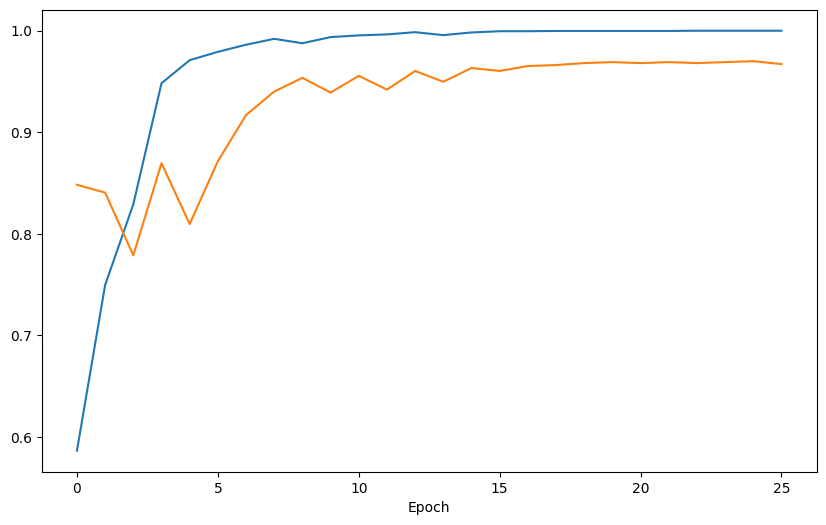

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(trained.history['accuracy'], label='Training accuracy')
plt.plot(trained.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
Accuracy: 0.9603864734299516
Precision: 0.9616352960345412
Recall: 0.9603864734299516
F1 Score: 0.960708902743635

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       739
           1       0.91      0.96      0.93       296

    accuracy                           0.96      1035
   macro avg       0.95      0.96      0.95      1035
weighted avg       0.96      0.96      0.96      1035



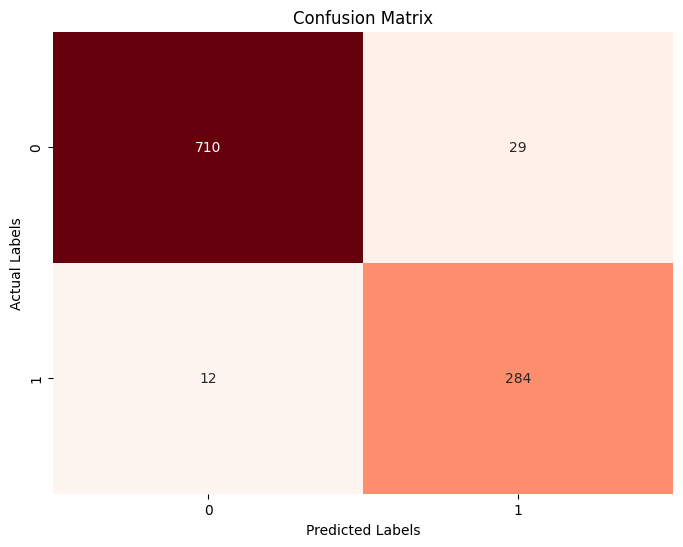

In [44]:
y_pred = model.predict(X_test)
y_pred = y_pred>0.5 # Get the predicted class labels

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the classification metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Print the classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [97]:
from keras.regularizers import l2
from keras.layers import Dropout

In [730]:
modelmlp = Sequential()
modelmlp.add(Dense(4096, activation='relu', input_shape=(X_train.shape[1],)))
modelmlp.add(Dense(1024, activation='relu'))
modelmlp.add(Dense(512, activation='relu'))
modelmlp.add(Dense(128, activation='relu'))
modelmlp.add(Dense(64, activation='relu'))
modelmlp.add(Dense(16, activation='relu'))
modelmlp.add(Dense(1, activation='sigmoid'))

modelmlp.summary()


Model: "sequential_103"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_645 (Dense)               │ (None, 4096)           │    12,292,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_646 (Dense)               │ (None, 1024)           │     4,195,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_647 (Dense)               │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_648 (Dense)               │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_649 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_650 (Dense)               │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_651 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,087,201 (65.18 MB)

 Trainable params: 17,087,201 (65.18 MB)

 Non-trainable params: 0 (0.00 B)

In [731]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=1e-6)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss', mode='min')

In [732]:
# Compile the model
modelmlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train with early stopping
trained = modelmlp.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_test,y_test), callbacks=[early_stopping, reduce_lr, model_checkpoint])

Epoch 1/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.6726 - loss: 0.9939 - val_accuracy: 0.9295 - val_loss: 0.1833 - learning_rate: 0.0010
Epoch 2/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9550 - loss: 0.1632 - val_accuracy: 0.9778 - val_loss: 0.0959 - learning_rate: 0.0010
Epoch 3/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9782 - loss: 0.1005 - val_accuracy: 0.9478 - val_loss: 0.1696 - learning_rate: 0.0010
Epoch 4/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9792 - loss: 0.0836 - val_accuracy: 0.9729 - val_loss: 0.1792 - learning_rate: 0.0010
Epoch 5/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9752 - loss: 0.3074 - val_accuracy: 0.9536 - val_loss: 0.4438 - learning_rate: 0.0010
Epoch 6/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9186 - loss: 0.6815 - val_accuracy: 0.9826 - val_loss: 0.0927 - learning_rate: 0.0010
Epoch 7/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9846 - loss: 0.1308 - val_accurac

Text(0.5, 0, 'Epoch')

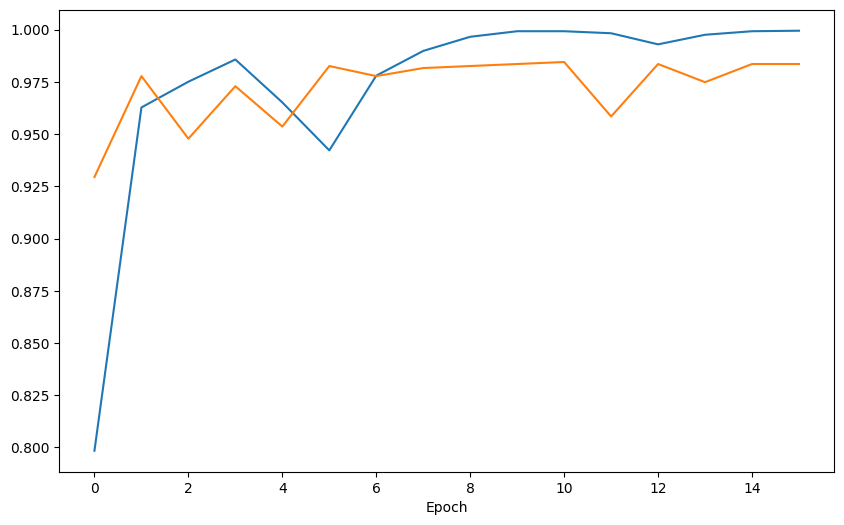

In [733]:
plt.figure(figsize=(10, 6))
plt.plot(trained.history['accuracy'], label='Training accuracy')
plt.plot(trained.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Accuracy: 0.9826086956521739
Precision: 0.9827135955831607
Recall: 0.9826086956521739
F1 Score: 0.9826434583059978

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       739
           1       0.96      0.98      0.97       296

    accuracy                           0.98      1035
   macro avg       0.98      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035



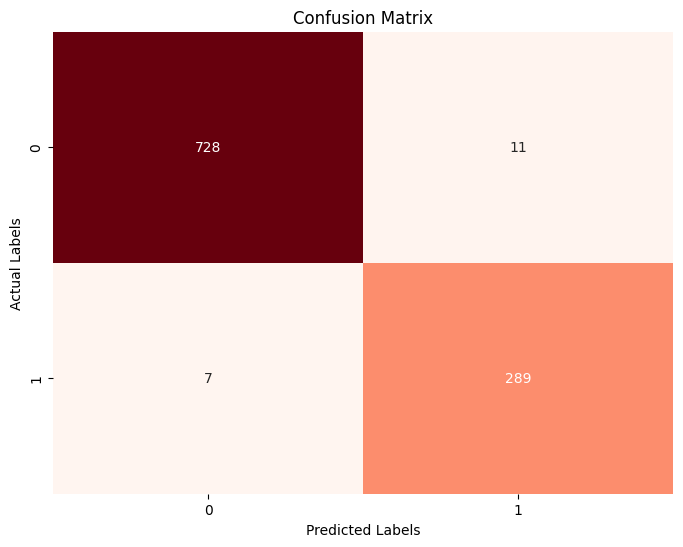

In [734]:
y_pred = modelmlp.predict(X_test)
y_pred = y_pred>0.5 # Get the predicted class labels

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the classification metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Print the classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()